# Modelo de Intercambio Aleatorio de Activos (RAE)

## Sistema económico cerrado con conservación de dinero

El modelo utilizado es el de [Dragulescu & Yakovenko (2000)](https://doi.org/10.1007/s100510070114)

### Descripción del modelo

Los agentes económicos interaccionan por pares mediante transacciones monetarias. 

Solo se puede dar o recibir dinero en las transacciones.

Los agentes perdedores se etiquetan con el indice $i$ mientras que los ganadores con el indice $j$.

Sean $m$ y $m'$ la cantidad de dinero que posee un agente, antes y después de la transacción la cual se da según:

$$ m_i \rightarrow m'_i = m_i - \Delta m$$
$$ m_j \rightarrow m'_j = m_j + \Delta m$$

donde $\Delta m$ es la cantidad de dinero que el agente perdedor le transfirió al agente ganador después de la transacción.


Algunos supuestos:
- El dinero se conserva, global y localmente, $m_i + m_j = m'_i + m'_j $.
- El balance de los ganadores no puede ser negativo, $m_j  \ge 0 \ \forall j $.
- Una transacción se da solamente cuando el agente "perdedor" tiene suficiente dinero para pagar, $m_i  \ge \Delta m$.
- No hay crédito ni deuda.


La mecánica estadística predice que el sistema económico alcanzara la distribución estacionaria de Boltzmann-Gibbs,

$$ P(m) = \frac{1}{T} e^{-m/T} $$

donde 

$$ T = \langle m \rangle = \frac{M}{N} $$

es la _"Temperatura del dinero"_, y es igual a la cantidad promedio de dinero. $M$ es la cantidad total de dinero en el sistema, y $N$ es el numero total de agentes en el sistema. 


## Cómo se realizan las simulaciones

Las simulaciones se realizan en el siguiente orden:

- Inicialmente todos los agentes tienen la misma cantidad de dinero.
- Se elige un par $(i, j)$ de agentes al azar, y e realiza la transacción, es decir, se transfiere la cantidad $\Delta m$.
- Se repite el paso anterior varias veces.



En este trabajo se realizan las simulaciones con cada una de las siguientes reglas de intercambio:

- **Regla 1**: Intercambio de una pequeña cantidad constante de dinero, $\Delta m = 1$.
- **Regla 2**: Intercambio de una fracción aleatoria $0 \le \nu \le 1$ del dinero promedio del par, $\Delta m = \nu \left( m_i + m_j \right)/2$
- **Regla 3**: Intercambio de una fracción aleatoria $0 \le \nu \le 1$ del dinero promedio del sistema,  $\Delta m = \nu T$

Observese que estas reglas tienen simetría de inversión temporal, ya que son invariantes ante una permutación de los índices $i$ y $j$.

### Paquetes a utilizar 

In [2]:
using Random, Distributions, CairoMakie, LaTeXStrings

### Condiciones iniciales

Los parámetros para las simulaciones son: $N = 5 \times 10^{5}$ y $M = 5 \times 10^{6}$. Por lo tanto, al principio de las simulaciones, los agentes contarán con la misma cantidad de dinero $\left\langle m \right\rangle = \frac{M}{N} = 10$.

In [3]:
N_exp = 5
N = 5 * 10^N_exp     

M_exp = 6
M = 5 * 10^M_exp

T = M/N 

10.0

#### Reglas de intercambio 

In [4]:
exchange_rules = ["small_constant", "random_pair_average", "random_system_average"]

3-element Vector{String}:
 "small_constant"
 "random_pair_average"
 "random_system_average"

In [5]:
mutable struct Agent
  money::Float64
end

In [6]:
p = Agent(3)

Agent(3.0)

In [7]:
p.money

3.0

In [8]:
# Initial conditions
N_exp = 5
M_exp = 6
T_exp = 7
million = 1_000_000
N = Int(5 * 10^N_exp)  # numero de agentes   
M = Int(5 * 10^M_exp) # Dinero total en el sistema 
T = Int(4 * 10^T_exp) # tiempo
M_prom = Int(M/N) # temperatura del dinero


10

In [9]:
function sim_01(N, M, M_prom, rule, T)
 
  Agentes = [Agent(M_prom) for i in 1:N]
  exchange_rules = ["small_constant", "random_pair_average", "random_system_average"]
  transaction_type = exchange_rules[rule]
  system_avg = M_prom
  for t in 1:T
    agent_i = rand(1:N)
    agent_j = rand(1:N)

    coin_flit = rand(1:2)
    loser_index = [agent_i, agent_j][coin_flit]
    winner_index = [agent_i, agent_j][2-coin_flit+1]

    delta_m = 0.0
    
    if transaction_type == "small_constant"
    delta_m += 1.0
    elseif transaction_type == "random_pair_average"
    avg = (Agentes[loser_index].money + Agentes[winner_index].money) / 2
    delta_m += rand(Uniform()) * avg
    elseif transaction_type == "random_system_average"
    delta_m += rand(Uniform()) * system_avg
    elseif transaction_type == "proportional"
    delta_m += 0.5 * lista.money
    end
    delta_m

    if Agentes[loser_index].money >= delta_m
      Agentes[loser_index].money -= delta_m
      Agentes[winner_index].money += delta_m
    end
  end

  wealth = [0.0 for i in 1:N]
  for i in 1:N
    wealth[i] = Agentes[i].money
  end

return wealth
end

sim_01 (generic function with 1 method)

In [10]:
sim = simulation(5, 6, 2, 7)

UndefVarError: UndefVarError: `simulation` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [11]:
length(sim)

UndefVarError: UndefVarError: `sim` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [12]:
max_val_sim = maximum(sim)
max_val_sim_int = Int(floor(max_val_sim))
m_values = range(0, stop = max_val_sim, length=max_val_sim_int)
P_values = length(sim) * (1 / 10) * exp.(-m_values / 10)  

UndefVarError: UndefVarError: `sim` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [13]:
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Distribución del dinero",
    xlabel = "Cantidad de Dinero",
    ylabel = "Agentes",
	)
stephist!(ax, sim, bins = max_val_sim_int, color = :black, label = "Simulación")
lines!(m_values, P_values, color=:red, label = L"P(m)=\frac{1}{T}e^{-m/T}")
axislegend(position=:rt)
f

UndefVarError: UndefVarError: `max_val_sim_int` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

En las simulaciones observamos que una distribución inicial estrecha, en la que todos los agentes tienen la misma cantidad de dinero, es inestable y evoluciona con el tiempo hacia una distribución amplia y sesgada, en la que muchos agentes tienen saldos monetarios bajos y pocos agentes tienen saldos monetarios altos. Finalmente, la distribución de dinero alcanza el equilibrio estadístico en la forma exponencial (la distribución de Boltzmann-Gibbs), de acuerdo con los principios generales de la física estadística y el principio de máxima entropía. 

Sin embargo, si una regla para transferencias de dinero no tiene simetría de inversión temporal , se pueden obtener otras distribuciones.

## Sistema económico cerrado con conservación de dinero 2.0: se rompe la simetría de inversión temporal

En este modelo de intercambio, la regla de transferencia es $\Delta m = \alpha m_i$, es decir, el intercambio es proporcional al saldo monetario del agente. 
Con esta regla se rompe la simetría de inversión temporal, por lo que el sistema puede tener una distribución estacionaria diferente a la de Boltzmann-Gibbs, o no tener ninguna distribución estacionaria.

Los parámetros para las simulaciones serán: $N = 5 \times 10^{5}$ y $M = 5 \times 10^{6}$. Por lo tanto, al principio de las simulaciones, los agentes contarán con la misma cantidad de dinero $\left\langle m \right\rangle = \frac{M}{N} = 10$.

Primero realizamos una simulación de intercambio aleatorio multiplicativo con $\alpha = 1/3$

In [14]:
# Initial conditions
N_exp = 5
M_exp = 6
T_exp = 7
million = 1_000_000
N = Int(5 * 10^N_exp)  # numero de agentes   
M = Int(5 * 10^M_exp) # Dinero total en el sistema 
T = Int(4 * 10^T_exp) # tiempo
M_prom = Int(M/N) # temperatura del dinero
α = 1/3

0.3333333333333333

In [15]:
Int(M_prom)

10

In [16]:
function sim_02(N, T, M_prom, α)
  Agentes = [Agent(M_prom) for i in 1:N]
  
  for t in 1:T
    agent_i = rand(1:N)
    agent_j = rand(1:N)

    coin_flit = rand(1:2)
    loser_index = [agent_i, agent_j][coin_flit]
    winner_index = [agent_i, agent_j][2-coin_flit+1]

    delta_m = α *  Agentes[loser_index].money

    if Agentes[loser_index].money >= delta_m
      Agentes[loser_index].money -= delta_m
      Agentes[winner_index].money += delta_m
    end
  end

  wealth = [0.0 for i in 1:N]
  for i in 1:N
    wealth[i] = Agentes[i].money
  end

return wealth
end

sim_02 (generic function with 1 method)

In [17]:
sim = sim_02(N, T, M_prom, α)

500000-element Vector{Float64}:
  4.490975505741664
 15.182831993603468
  5.594615819201233
 16.27118383769589
  9.496552881153276
 16.024848095654544
  4.384420179841552
  6.9312900721094115
  7.1839478242478
  9.808714777062882
  ⋮
 13.39410094895107
  3.561778734164726
 11.094425571306644
 25.120676598524096
 13.624632518783352
 22.97513501621258
 14.254613195374391
 23.941084530651267
 17.50454873420148

In [18]:
max_val_sim = maximum(sim)
max_val_sim_int = Int(floor(max_val_sim))
m_values = range(0, stop = max_val_sim, length=max_val_sim_int)
P_values = length(sim) * (1 / M_prom) * exp.(-m_values / M_prom)  

100-element Vector{Float64}:
 50000.0
 45168.57282367125
 40803.99941854586
 36861.16838467257
 33299.32737097383
 30081.66186670202
 27174.914693663697
 24549.042266356053
 22176.90406718574
 20033.98212724501
     ⋮
     4.817360475532496
     4.351865949139297
     3.9313514808510734
     3.551470713165393
     3.208297270774931
     2.8982841782996656
     2.6182271994244544
     2.3652317185224074
     2.1366828224587264

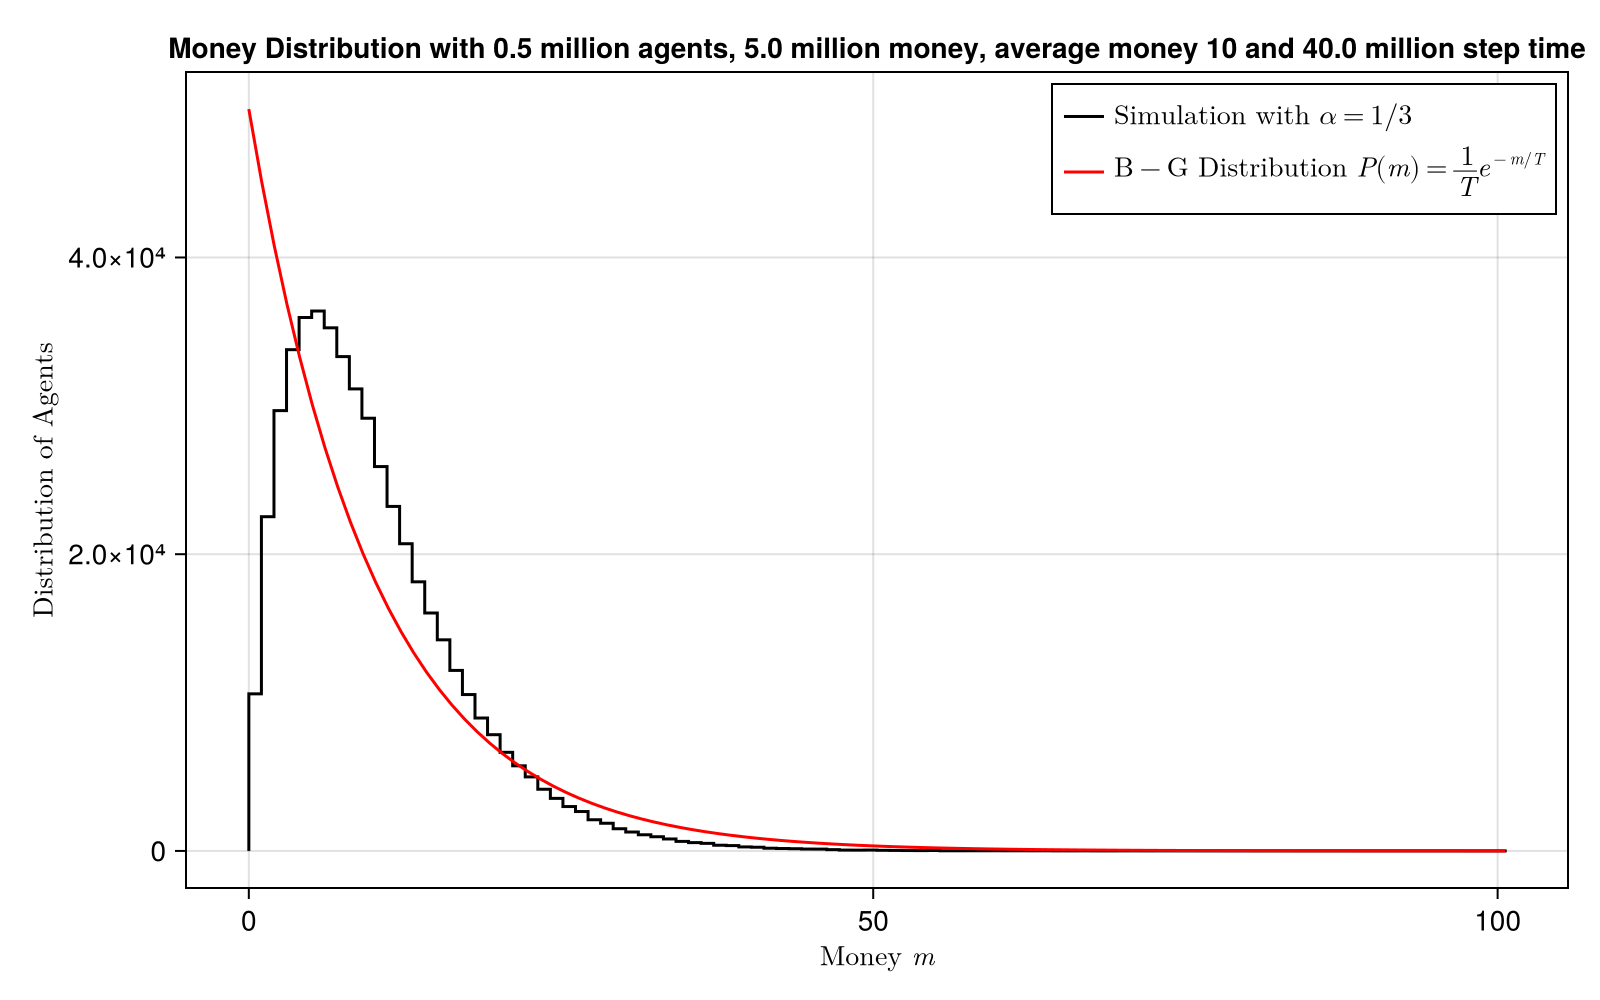

In [19]:
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
	)
stephist!(ax, sim, bins = max_val_sim_int, color = :black, label = L"Simulation with $\alpha = 1/3$")
lines!(m_values, P_values, color=:red, label = L"B-G Distribution $P(m)=\frac{1}{T}e^{-m/T}$")
axislegend(position=:rt)
f

Podemos observar que la distribución estacionaria tiene una forma diferente a la distribución B-G: todavía tiene un extremo exponencial en el extremo superior, pero cae a cero en el extremo inferior. 

Esto último se cumple para simulaciones con $\alpha < 1/2$. 

Por otra parte, si realizamos una simulación de intercambio aleatorio multiplicativo con $\alpha = 1/2$, tenemos que

In [20]:
α=1/2
sim = sim_02(N, T, M_prom, α)

500000-element Vector{Float64}:
 14.213609250570649
  4.227884816806723
 10.067817633100027
  3.6311860969181797
 10.577550989110577
  7.453009306779853
  9.918434801838918
  1.006039689090393
  3.2924073734821544
 56.130572799571695
  ⋮
 10.62134793192728
  1.3252135510985363
 12.46359655368946
  8.622430371289676
 27.592000280611973
  2.1572436449225956
  0.6371937013044078
 14.336560856309644
 14.376739926566337

In [21]:
max_val_sim = maximum(sim)
max_val_sim_int = Int(floor(max_val_sim))
m_values = range(0, stop = max_val_sim, length=max_val_sim_int)
P_values = length(sim) * (1 / M_prom) * exp.(-m_values / M_prom) 

158-element Vector{Float64}:
 50000.0
 45196.705210900735
 40854.84323842123
 36930.086125689704
 33382.364320719455
 30175.45758892895
 27276.625225017182
 24656.27178886641
 22287.644952824863
 20146.562375560898
     ⋮
     0.01456629293631031
     0.013166968957160843
     0.011902072289557603
     0.010758689053399296
     0.009725145952044663
     0.008790891094550935
     0.00794638626683103
     0.007183009551878232
     0.006492967304866499

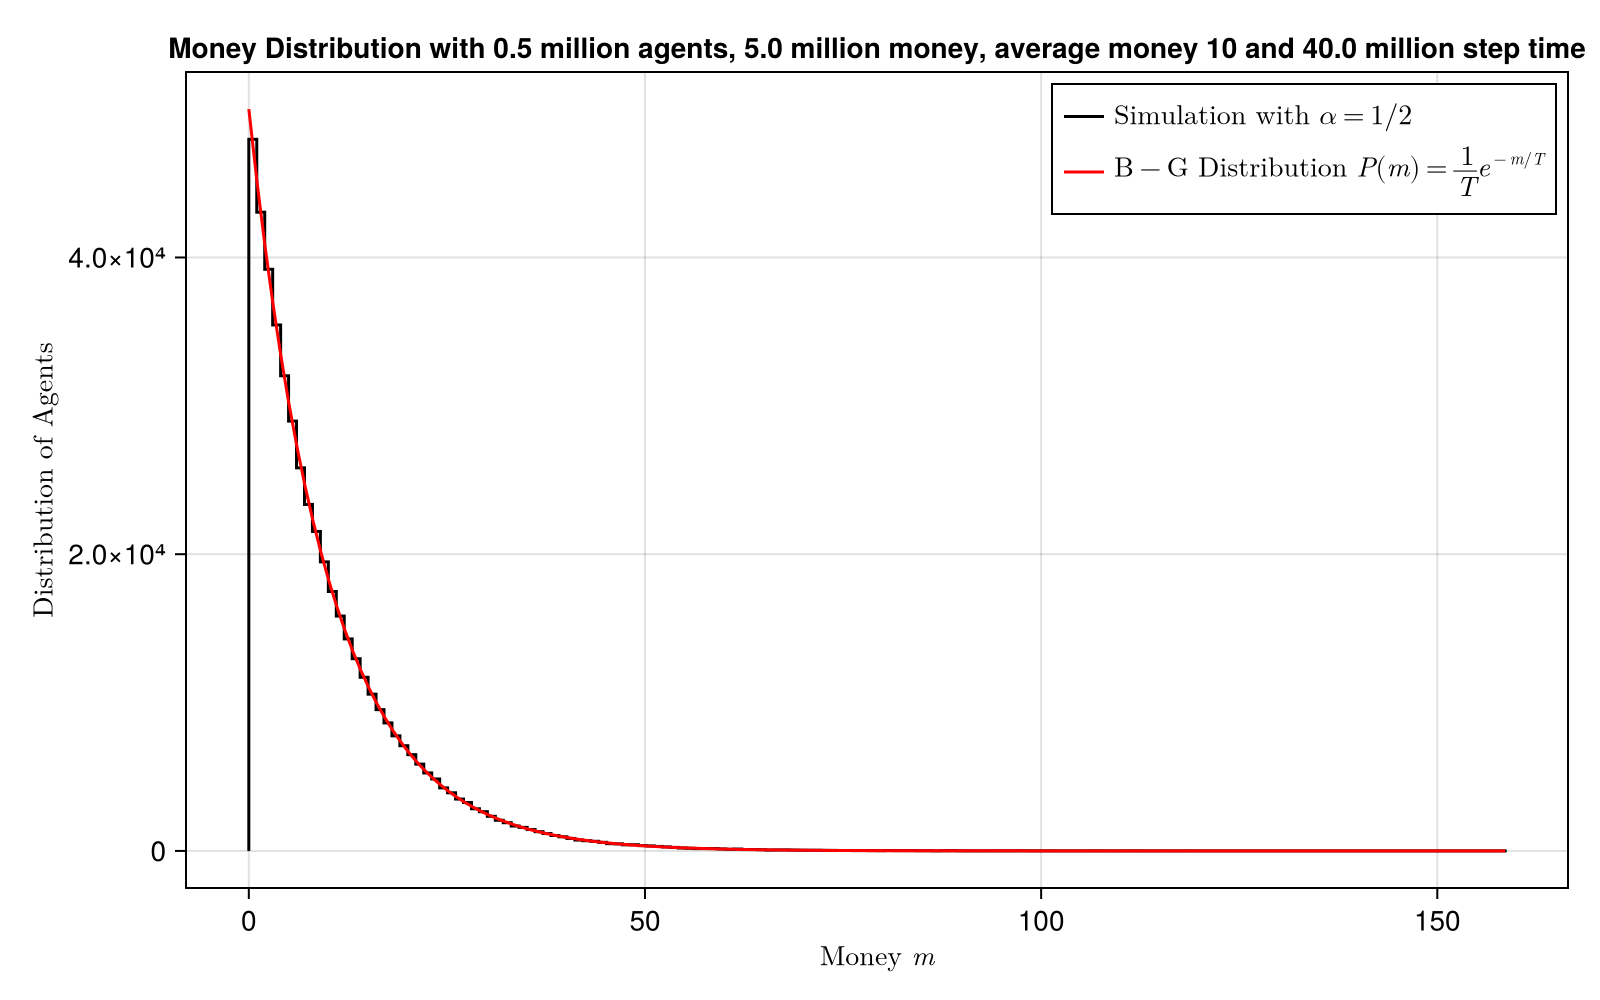

In [22]:
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
	)
stephist!(ax, sim, bins = max_val_sim_int, color = :black, label = L"Simulation with $\alpha = 1/2$")
lines!(m_values, P_values, color=:red, label = L"B-G Distribution $P(m)=\frac{1}{T}e^{-m/T}$")
axislegend(position=:rt)
f

### Modelo de intercambio aleatorio con ahorro: Simulaciones

Otro ejemplo de tipo similar al anterior es uno donde los agentes guardan una fracción $\lambda$ de su dinero e intercambian una fracción aleatoria $\epsilon$ de su dinero total restante,

$$
m_i \longrightarrow m'_i = \lambda m_{i} + \epsilon \left( 1-\lambda \right)\left( m_i + m_j \right) \\
m_j \longrightarrow m'_j = \lambda m_{j} + \left( 1-\epsilon \right) \left( 1-\lambda \right)\left( m_i + m_j \right)
$$

de donde se deduce que la regla de intercambio es

$$
\Delta m = m_i - m'_i = \left( 1-\lambda \right)\left[ m_i - \epsilon \left( m_i+m_j \right) \right]
$$

En esta regla de intercambio se rompe la simetría de inversión temporal, por lo que la distribución estacionaria puede ser diferente a la distribución B-G.

Los parámetros para una simulación serán: $\lambda = 1/4$, $N = 5 \times 10^{5}$ y $M = 5 \times 10^{6}$. 

Por lo tanto, al principio de las simulaciones, los agentes contarán con la misma cantidad de dinero $\left\langle m \right\rangle = \frac{M}{N} = 10$.

In [23]:
# Initial conditions
N_exp = 5
M_exp = 6
T_exp = 7
million = 1_000_000
N = Int(5 * 10^N_exp)  # numero de agentes   
M = Int(5 * 10^M_exp) # Dinero total en el sistema 
T = Int(4 * 10^T_exp) # tiempo
M_prom = Int(M/N) # temperatura del dinero
λ = 1/4

0.25

In [24]:
function sim_03(N, T, M_prom, λ)
  Agentes = [Agent(M_prom) for i in 1:N]
  
  for t in 1:T
    ϵ = rand(Uniform(0.0, 1.0))
    agent_i = rand(1:N)
    agent_j = rand(1:N)

    coin_flit = rand(1:2)
    loser_index = [agent_i, agent_j][coin_flit]
    winner_index = [agent_i, agent_j][2-coin_flit+1]

    delta_m = (1 - λ) *  ( Agentes[loser_index].money - ϵ * (Agentes[loser_index].money + Agentes[winner_index].money))

    if Agentes[loser_index].money >= delta_m
      Agentes[loser_index].money -= delta_m
      Agentes[winner_index].money += delta_m
    end
  end

  wealth = [0.0 for i in 1:N]
  for i in 1:N
    wealth[i] = Agentes[i].money
  end

return wealth
end

sim_03 (generic function with 1 method)

In [25]:
sim = sim_03(N, T, M_prom, λ)

500000-element Vector{Float64}:
 21.72160138877579
 11.400959191418922
 28.62293623970456
 18.045949499717487
  9.549275660900104
  7.376799402334131
 28.38116586463167
  1.8604573288358859
 23.397572421818893
 14.278551500378242
  ⋮
 13.38369714612147
 10.250296972938365
  9.120884082916813
  0.8689495274349479
 12.079084481900468
  3.6365349605459905
  6.801930153695867
 11.631749824557666
 14.214340110005732

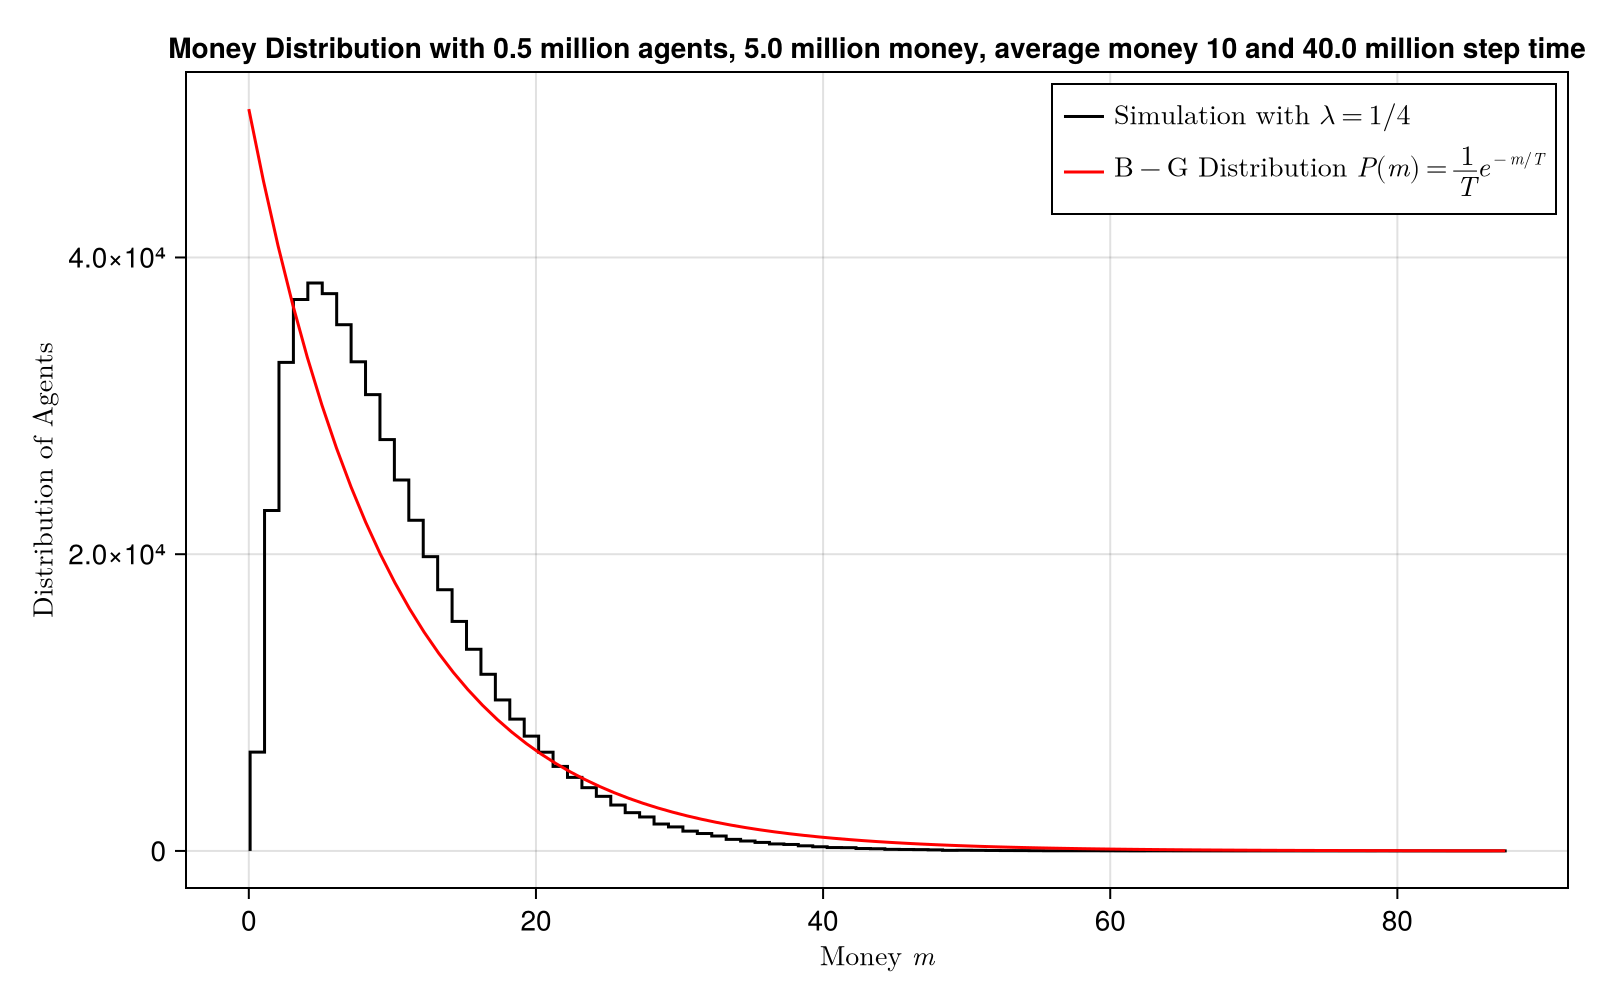

In [26]:
# parameters B-G distribution
max_val_sim = maximum(sim)
max_val_sim_int = Int(floor(max_val_sim))
m_values = range(0, stop = max_val_sim, length=max_val_sim_int)
P_values = length(sim) * (1 / M_prom) * exp.(-m_values / M_prom) 

# Graph
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
	)
stephist!(ax, sim, bins = max_val_sim_int, color = :black, label = L"Simulation with $\lambda = 1/4$")
lines!(m_values, P_values, color=:red, label = L"B-G Distribution $P(m)=\frac{1}{T}e^{-m/T}$")
axislegend(position=:rt)
f

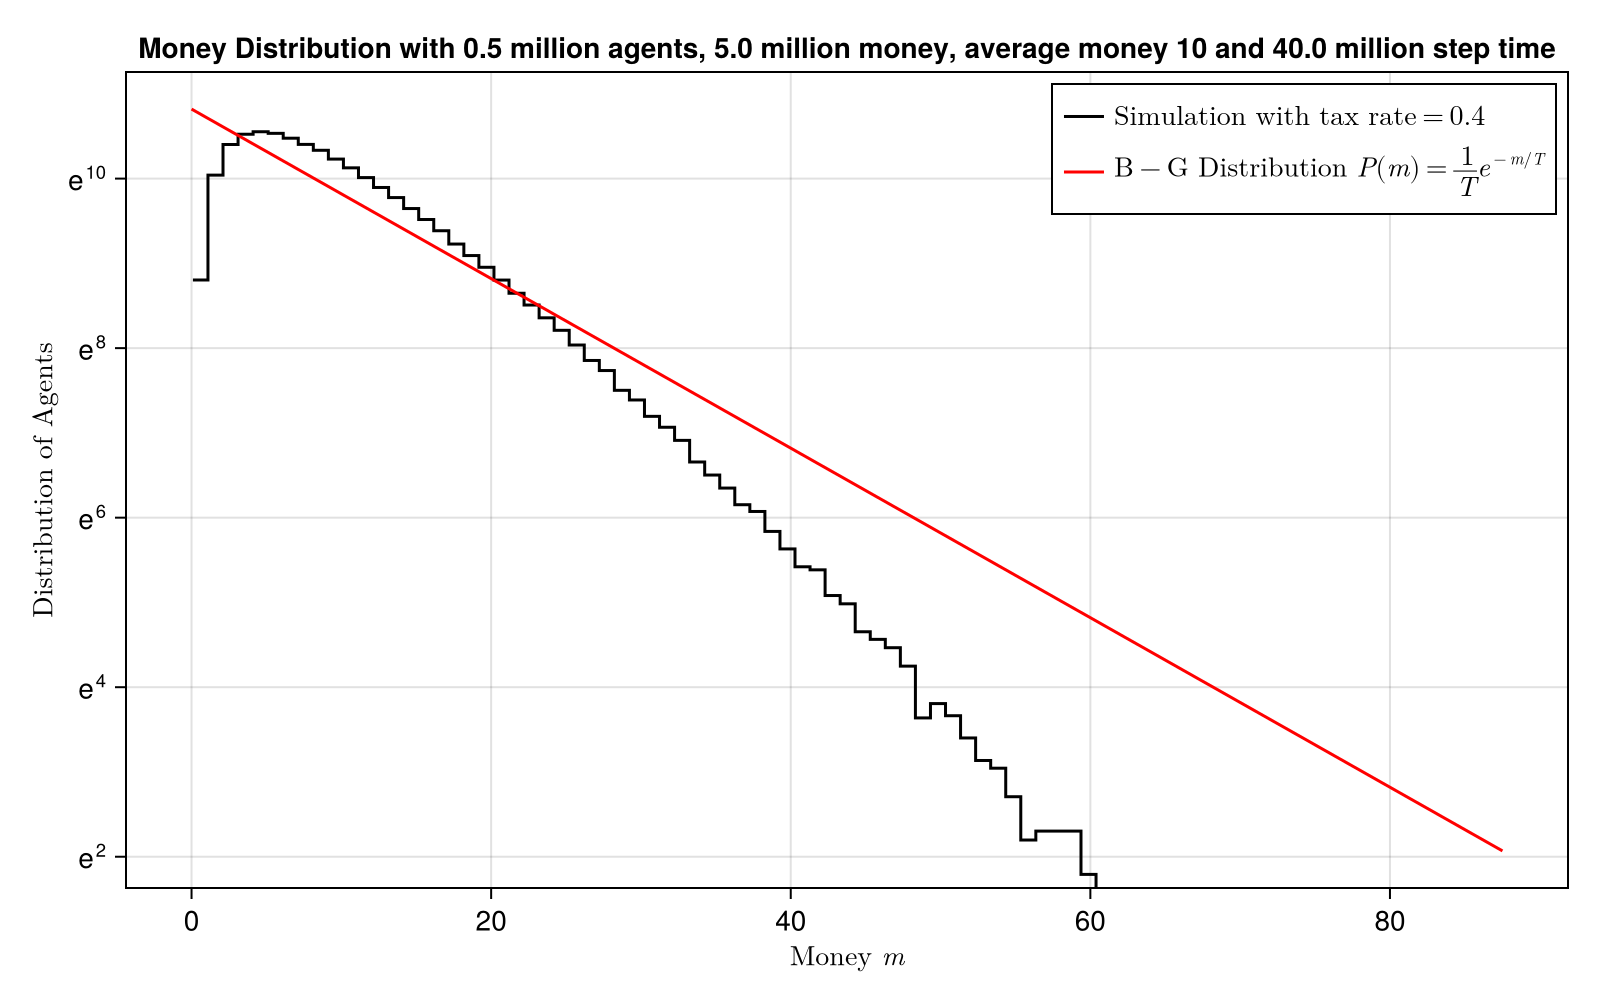

In [27]:
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
    yscale = log
	)
stephist!(ax, sim, bins = max_val_sim_int, color = :black, label = L"Simulation with $\text{tax rate} = 0.4$")
lines!(m_values, P_values, color=:red, label = L"B-G Distribution $P(m)=\frac{1}{T}e^{-m/T}$")
axislegend(position=:rt)
f

Se puede observar que la forma de la distribución estacionaria tiene una forma cualitativamente similar a la que tiene la distribución estacionaria del modelo de intercambio multiplicativo.

### Modelo de intercambio aleatorio con impuestos y subsidios.

Otro ejemplo interesante cuya distribución no es de B-G ocurre en un modelo con impuestos y subsidios. 

Supongamos que hay un agente especial ("gobierno"), el cual recolecta una fracción $f$ ("impuesto") de toda transacción en el sistema, de tal manera que cada agente recibe un subsidio $\delta m$ con una frecuencia $1 / \tau_s$.

A continuación se muestran los resultados de una simulación. 

Los parámetros son: $f = 0.40$, $\tau_s = 4000$, $N = 5 \times 10^{4}$ y $M = 5 \times 10^{5}$. 

Por lo tanto, al principio de las simulaciones, los agentes cuentan con la misma cantidad de dinero $\left\langle m \right\rangle = \frac{M}{N} = 10$.

In [28]:
# Initial conditions
N_exp = 4
M_exp = 5
T_exp = 6
million = 1_000_000
N = Int(5 * 10^N_exp)  # numero de agentes   
M = Int(5 * 10^M_exp) # Dinero total en el sistema 
T = Int(4 * 10^T_exp) # tiempo
M_prom = Int(M/N) # temperatura del dinero
tax_rate = 0.4 #f 
τₛ = 4000

4000

In [29]:
mutable struct State
  money::Float64
  tax_rate::Float64
end

In [30]:
function collect_taxes(gob::State, from_amount)
  gob.money += (gob.tax_rate * from_amount)
end

collect_taxes (generic function with 1 method)

In [31]:
function subsidize(gob::State, to_agents)
  dm = gob.money / length(to_agents)
  for i in length(to_agents)
    gob.money -= dm
    to_agents[i].money += dm
  end
end

subsidize (generic function with 1 method)

In [32]:
government = State(0.0, tax_rate)
government.tax_rate

0.4

In [33]:
function sim_04(N, M, M_prom, rule, T, tax_rate, τₛ)
	
  Agentes = [Agent(M_prom) for i in 1:N]
  government = State(0.0, tax_rate)

  exchange_rules = ["small_constant", "random_pair_average", "random_system_average"]
  transaction_type = exchange_rules[rule]
  system_avg = M_prom
  for t in 1:T
    agent_i = rand(1:N)
    agent_j = rand(1:N)

    coin_flit = rand(1:2)
    loser_index = [agent_i, agent_j][coin_flit]
    winner_index = [agent_i, agent_j][2-coin_flit+1]

    delta_m = 0.0
    
    if transaction_type == "small_constant"
    delta_m += 1.0
    elseif transaction_type == "random_pair_average"
    avg = (Agentes[loser_index].money + Agentes[winner_index].money) / 2
    delta_m += rand(Uniform()) * avg
    elseif transaction_type == "random_system_average"
    delta_m += rand(Uniform()) * system_avg
    elseif transaction_type == "proportional"
    delta_m += 0.5 * lista.money
    end
    delta_m

    if Agentes[loser_index].money >= delta_m
      Agentes[loser_index].money -= delta_m
      government.money += (government.tax_rate * delta_m)
      delta_m *= (1- government.tax_rate)
      Agentes[winner_index].money += delta_m
    end

    if t % τₛ == 0
      dm = government.money / N
      for i in 1:N
      government.money -= dm
      Agentes[i].money += dm 
      end
    end
  end

  wealth = [0.0 for i in 1:N]
  for i in 1:N
    wealth[i] = Agentes[i].money
  end

return wealth
end

sim_04 (generic function with 1 method)

In [34]:
sim = sim_04(N, M, M_prom, 3, T, tax_rate, τₛ)

50000-element Vector{Float64}:
 11.331953229681003
  3.460915809117296
  9.699672331078157
  3.6826790333196726
  3.8964874606041757
  4.046904064223847
  2.8571880363610065
  2.59425063609439
  2.8328362184180307
  2.8285819044781375
  ⋮
  8.112678313382496
  1.1731823768544432
 20.848412641184005
  6.866752169113294
 16.260130517111453
 12.350824445481498
  5.846468358833468
 11.94246964399447
  8.280675559634338

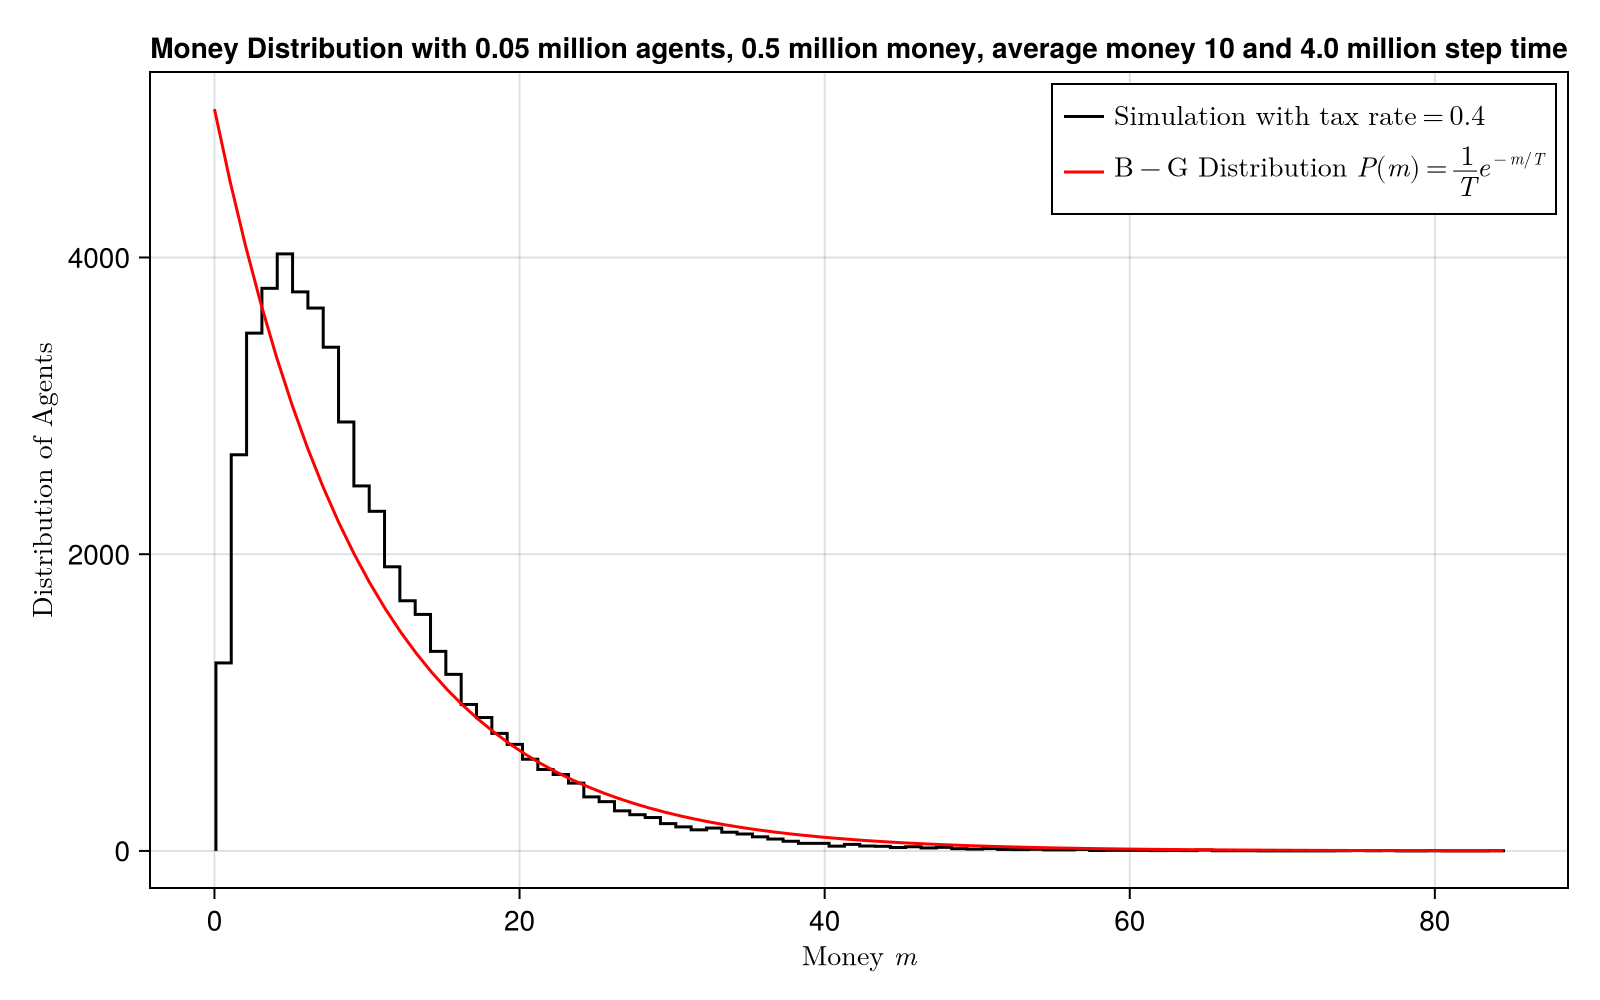

In [35]:
# parameters B-G distribution
max_val_sim = maximum(sim)
max_val_sim_int = Int(floor(max_val_sim))
m_values = range(0, stop = max_val_sim, length=max_val_sim_int)
P_values = length(sim) * (1 / M_prom) * exp.(-m_values / M_prom) 

# Graph
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
    #yscale = log
	)
stephist!(ax, sim, bins = max_val_sim_int, color = :black, label = L"Simulation with $\text{tax rate} = 0.4$")
lines!(m_values, P_values, color=:red, label = L"B-G Distribution $P(m)=\frac{1}{T}e^{-m/T}$")
axislegend(position=:rt)
f

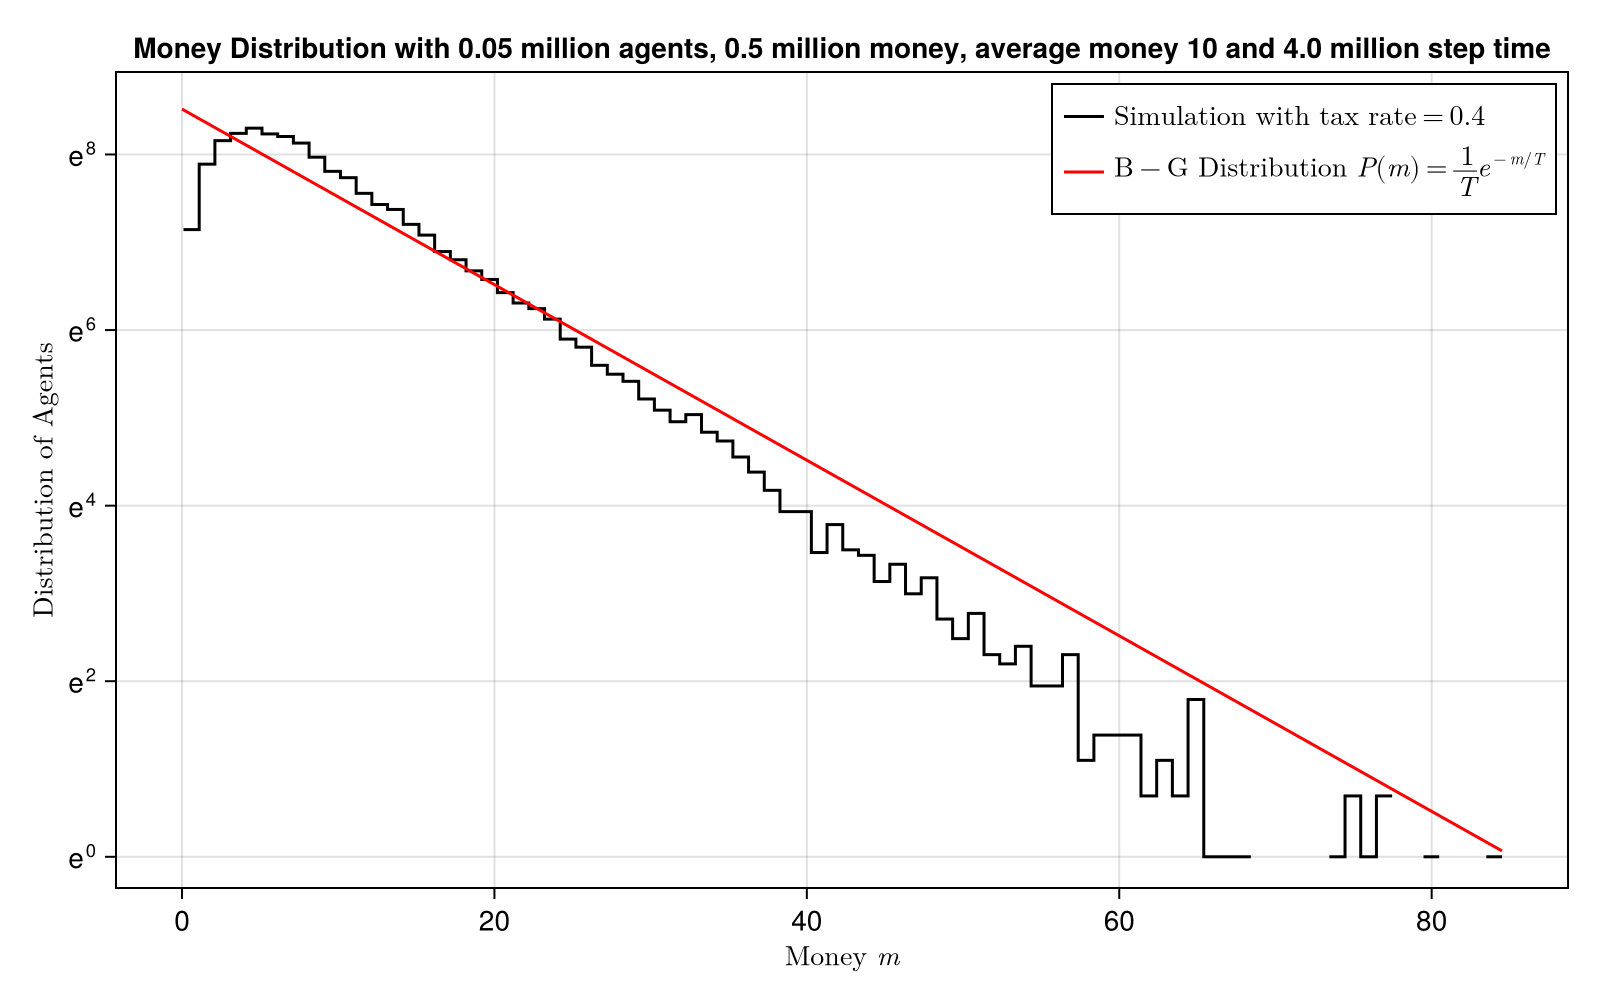

In [36]:
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
    yscale = log
	)
stephist!(ax, sim, bins = max_val_sim_int, color = :black, label = L"Simulation with $\text{tax rate} = 0.4$")
lines!(m_values, P_values, color=:red, label = L"B-G Distribution $P(m)=\frac{1}{T}e^{-m/T}$")
axislegend(position=:rt)
f

Se puede observar que la distribución estacionaria es una distribución B-G desplazada. La población con bajos niveles económicos se ve disminuida porque el gobierno, actuando como una fuerza externa, “expulsa” a esa población y empuja al sistema fuera del equilibrio termodinámico. 

Estos ejemplos muestran que la distribución de Boltzmann-Gibbs no es completamente universal, es decir, no se cumple para cualquier modelo de intercambio que conserve dinero. Sin embargo, es universal en un sentido limitado: para una amplia clase de modelos que tienen simetría de inversión temporal, la distribución estacionaria es exponencial y no depende de los detalles de un modelo. 

Por el contrario, cuando se rompe la simetría de inversión temporal, la distribución puede depender de los detalles del modelo. La diferencia entre estas dos clases de modelos puede ser bastante sutil.

A diferencia de lo que ocurre en la física, en economía no existe un requisito fundamental de que las interacciones tengan simetría de inversión temporal. Sin embargo, en ausencia de un conocimiento detallado de la dinámica microscópica real del intercambio económico, la distribución semiuniversal de Boltzmann-Gibbs parece ser un punto de partida natural.

## Modelos con deuda

Ahora analicemos qué sucede si se permite a los agentes endeudarse. La deuda puede considerarse como dinero negativo. Ahora bien, cuando un perdedor no tiene suficiente dinero para pagar, puede pedir prestada la cantidad necesaria a un depósito o "reservorio", y su saldo se vuelve negativo. No se viola la ley de conservación: la suma del dinero positivo del ganador y el dinero negativo del perdedor permanece constante. Cuando un agente con un saldo negativo recibe dinero como ganador, utiliza este dinero para pagar la deuda hasta que su saldo se vuelve positivo. 

Suponemos, para simplificar, que el "reservorio" no cobra intereses por el dinero prestado. Sin embargo, como no es sensato permitir una deuda ilimitada, ponemos un límite $m_d$ a la deuda máxima de un agente: $m_{i} > -m_{d}$. Esta nueva condición a la frontera $P\left( m < -m_{d} \right) = 0$ reemplaza a la vieja condición $P\left( m < 0 \right) = 0$. De nuevo $P\left( m \right)$ está dada por la ley de Boltzmann-Gibbs, 

$$
P\left( m  \right) = \frac{1}{T}\exp \left[ -\left( m+m_d \right)/T \right]
$$ 

(así se cumple la condición de normalización $\int_{-m_d}^{\infty }P\left( m  \right) dm = 1$), pero ahora,

$$
\left\langle m \right\rangle = \int_{-m_d}^{\infty }m P\left( m  \right) dm = T-m_{d}
$$

por lo que ahora se tiene una temperatura de dinero $T = M/N + m_{d}$ más alta.

### Descripción del modelo

Los agentes económicos interaccionan a pares mediante transacciones monetarias. Solo se puede recibir o dar dinero en las transacciones.

Sean $i$ ("perdedor") y $j$ ("ganador") un par de agentes económicos que interaccionan. Sean $m$ y $m'$ la cantidad de dinero que posee un agente, antes y después de la transacción, la cual se da según

$$
m_i \longrightarrow m'_i = m_i - \Delta m \\
m_j \longrightarrow m'_j = m_j + \Delta m
$$

donde $\Delta m$ es el dinero que el "perdedor" transfirió al "ganador" después de la transacción.

Suposiciones y restricciones:

* El dinero se conserva, global y localmente, $m_i + m_j = m'_i + m'_j$
* El balance de los ganadores no puede ser menor a la deuda máxima, $m_i \ge -m_{d} \forall i$
* Una transacción se da solamente cuando el agente "perdedor" tiene el suficiente dinero para pagar, $m_{i} \ge \Delta m - m_{d}$

### Cómo se realizan las simulaciones

Los pasos para realizar una simulación son los siguientes:
* Inicialmente todos los agentes tienen la misma cantidad de dinero.
* Se elige un par ($i,j$) de agentes al azar, y se realiza la transacción, es decir, se transfiere la cantidad $\Delta m$.
* Se repite el paso anterior muchas veces.

En este trabajo se realizan simulaciones con cada una de las siguientes reglas de intercambio:
* Regla 1: Intercambio de una pequeña cantidad constante, $\Delta m = 1$.
* Regla 2: Intercambio de una fracción aleatoria $0 \le \nu \le 1$ del dinero promedio del par, $\Delta m = \nu \left[ \left( m_i + m_j \right)/2 + m_d \right] $
* Regla 3: Intercambio de una fracción aleatoria $0 \le \nu \le 1$ del dinero promedio del sistema,  $\Delta m = \nu M/N$

Nótese que el modelo anterior se generaliza al modelo con deuda si hacemos el cambio de variable $m \longrightarrow m + m_{d}$.

Los parámetros para las simulaciones son: $N = 5 \times 10^{4}$ y $M = 5 \times 10^{5}$. Por lo tanto, al principio de las simulaciones, los agentes contarán con la misma cantidad de dinero $\left\langle m \right\rangle = \frac{M}{N} = 10$.

Primero realicemos una simulación para deuda máxima $m_d = 8$. La temperatura de dinero del sistema de agentes sera, por lo tanto, $T = M/N + m_d = 18$.

In [37]:
# Initial conditions
N_exp = 4
M_exp = 5
T_exp = 5
million = 1_000_000
N = Int(5 * 10^N_exp)  # numero de agentes   
M = Int(5 * 10^M_exp) # Dinero total en el sistema 
T = Int(4 * 10^T_exp) # tiempo
M_avg = Int(M/N) # temperatura del dinero

m_d = 8 #deuda maxima

M_prom = M_avg + m_d # temperatura del dinero con deuda 


18

In [38]:
mutable struct Agent_debt
  money::Float64
  max_debt::Float64
end

In [39]:
Agent_debt(10, 8)

Agent_debt(10.0, 8.0)

In [40]:
function sim_05(N, M, M_avg, m_d, rule, T)
	
  Agentes = [Agent_debt(M_avg, m_d) for i in 1:N] # money = M_avg
  exchange_rules = ["small_constant", "random_pair_average", "random_system_average"]
  transaction_type = exchange_rules[rule]
  system_avg = M_avg

  for t in 1:T
    agent_i = rand(1:N)
    agent_j = rand(1:N)

    coin_flit = rand(1:2)
    loser_index = [agent_i, agent_j][coin_flit]
    winner_index = [agent_i, agent_j][2-coin_flit+1]

    delta_m = 0.0
    
    if transaction_type == "small_constant"
    delta_m += 1.0
    elseif transaction_type == "random_pair_average"
    avg = ( (Agentes[loser_index].money + Agentes[winner_index].money) / 2 ) + Agentes[loser_index].max_debt 
    delta_m += rand(Uniform()) * avg
    elseif transaction_type == "random_system_average"
    delta_m += rand(Uniform()) * system_avg
    elseif transaction_type == "proportional"
    delta_m += 0.5 * ( lista.money + Agentes[loser_index].max_debt )
    end
    delta_m

    if (Agentes[loser_index].money + Agentes[loser_index].max_debt) >= delta_m
      Agentes[loser_index].money -= delta_m
      Agentes[winner_index].money += delta_m
    end
  end

  wealth = [0.0 for i in 1:N]
  for i in 1:N
    wealth[i] = Agentes[i].money
  end

return wealth
end

sim_05 (generic function with 1 method)

In [41]:
sim = sim_05(N, M, M_avg, m_d, 2, T)

50000-element Vector{Float64}:
  6.649726127793017
  9.731256445569427
 -5.256522483314024
 -5.916234041870873
 -7.587575692966617
 18.806406787068827
 -5.843512436944762
  5.798586024073835
  1.026019431683597
 -1.7819894795408544
  ⋮
 15.617722714869197
  4.318380719676665
 36.25362706877656
 -5.3800863431823505
 19.633345343553426
 11.099097594059156
 -3.107723595486693
 -4.7338970303702235
  2.8181594137990036

In [42]:
minimum(sim)

-7.999235514201522

In [43]:
Int(floor(minimum(sim)))

-8

In [44]:
m_d

8

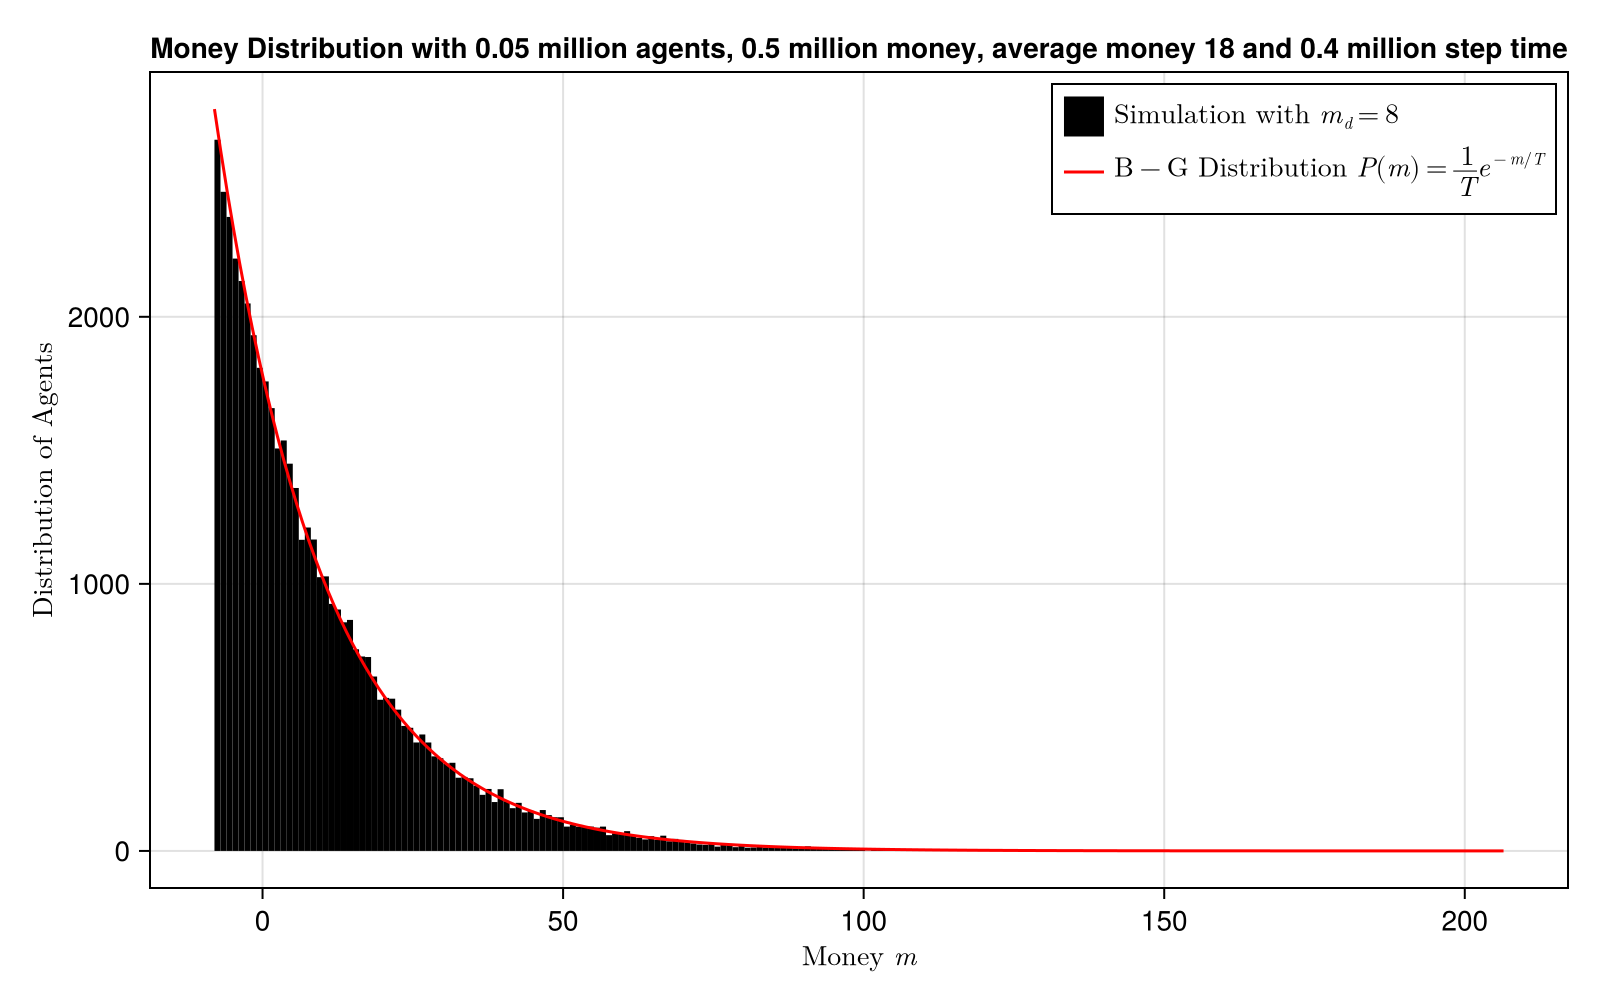

In [45]:
max_val_sim = maximum(sim) + m_d
max_val_sim_int = Int(floor(max_val_sim) )
m_values = range(-m_d, stop = max_val_sim, length=max_val_sim_int)
P_values = length(sim) * (1 / (M_prom)) * exp.(-(m_values .+ m_d)/ (M_prom)) 

# Graph
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
    #yscale = log
	)
hist!(ax, sim, bins = max_val_sim_int, color = :black, label = L"Simulation with $m_d = 8$")
lines!(m_values, P_values, color=:red, label = L"B-G Distribution $P(m)=\frac{1}{T}e^{-m/T}$")
axislegend(position=:rt)
f

Luego realicemos una simulación sin deuda, $m_d = 0$, para comparar. La temperatura de dinero del sistema de agentes sera, por lo tanto, $T = M/N + m_d = 10$.

In [46]:
# Initial conditions
N_exp = 4
M_exp = 5
T_exp = 5
million = 1_000_000
N = Int(5 * 10^N_exp)  # numero de agentes   
M = Int(5 * 10^M_exp) # Dinero total en el sistema 
T = Int(4 * 10^T_exp) # tiempo
M_avg = Int(M/N) # temperatura del dinero

m_d = 0 #deuda maxima

M_prom = M_avg + m_d # temperatura del dinero con deuda 

10

In [47]:
sim_2 = sim_05(N, M, M_avg, m_d, 2, T)

50000-element Vector{Float64}:
 13.107723562261306
  4.427203102618477
  7.009543168353101
  2.7736334941670595
  2.236376423377628
  6.985127532856898
  3.2859224627770645
  7.386446133042515
  4.937330424861971
 12.30432122031647
  ⋮
  5.7225488041862675
 16.781110329942074
  2.150446917498316
  4.876807482407822
  8.386099894484222
  0.6697485192144285
  1.8649304539439506
 15.920225955866545
  3.502891395240307

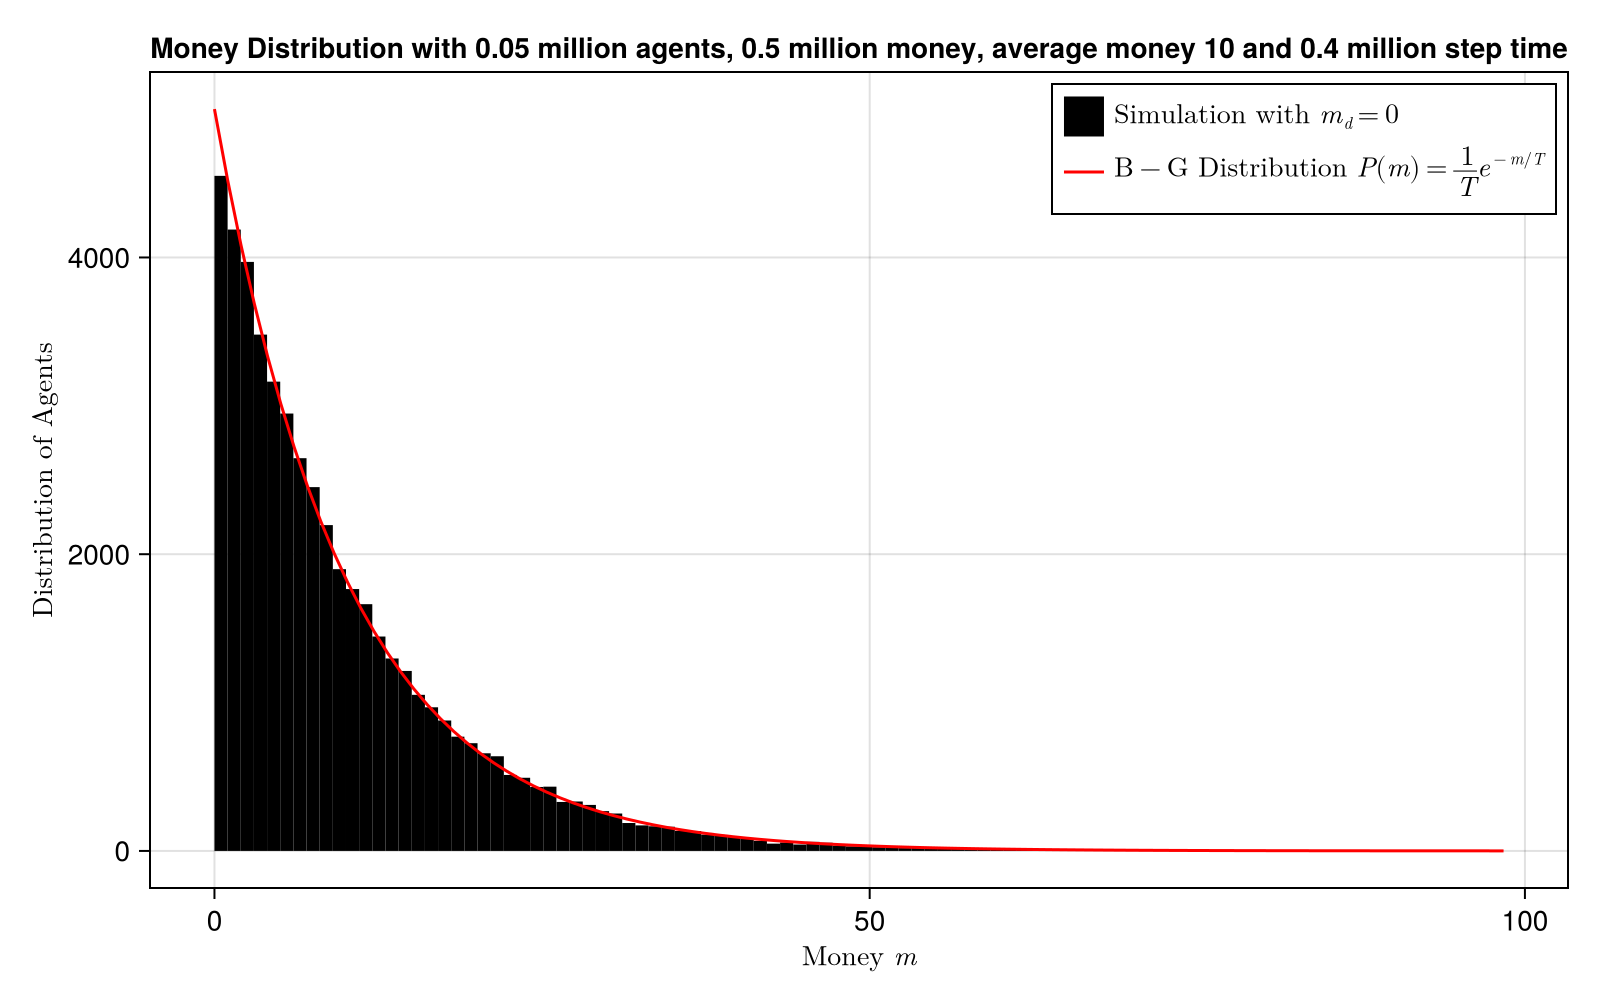

In [48]:
max_val_sim_2 = maximum(sim_2) + m_d
max_val_sim_int_2 = Int(floor(max_val_sim_2))
m_values_2 = range(-m_d, stop = max_val_sim_2, length=max_val_sim_int_2)
P_values_2 = length(sim) * (1 / (M_prom)) * exp.(-(m_values_2 .+ m_d)/ (M_prom)) 

# Graph
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
    #yscale = log
	)
hist!(ax, sim_2, bins = max_val_sim_int_2, color = :black, label = L"Simulation with $m_d = 0$")
lines!(m_values_2, P_values_2, color=:red, label = L"B-G Distribution $P(m)=\frac{1}{T}e^{-m/T}$")
axislegend(position=:rt)
f

Por último, si comparamos las distribuciones B-G para ambos casos

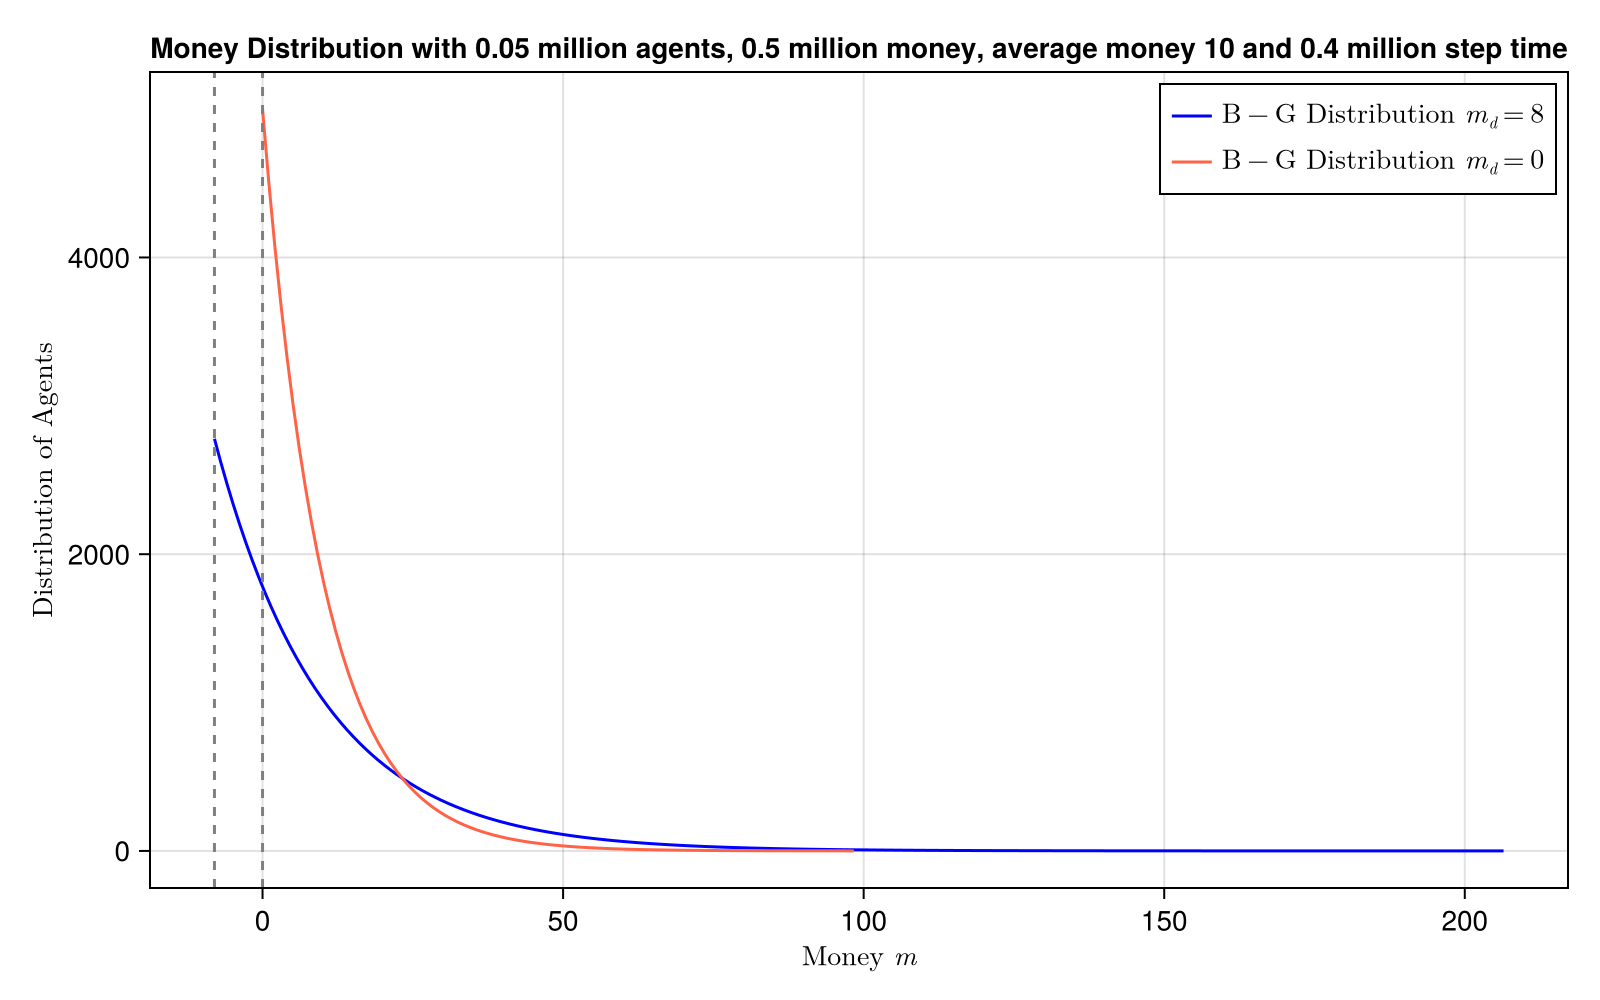

In [49]:
# Graph
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
    #yscale = log
	)
lines!(m_values, P_values, color=:blue, label = L"B-G Distribution $m_d = 8$")
vlines!(-8, color=:gray, linestyle=:dash )
lines!(m_values_2, P_values_2, color=:tomato, label = L"B-G Distribution $m_d = 0$")
vlines!(0, color=:gray, linestyle=:dash )
axislegend(position=:rt)
f

Citando el artículo, 

> vemos que la temperatura más alta hace que la distribución del dinero sea más amplia, lo que significa que la deuda aumenta la desigualdad entre los agentes.

Para probar o refutar este enunciado, vamos a calcular el coeficiente Gini, es decir, el grado de desigualdad presente en la distribución de dinero B-G con deuda.

El coeficiente Gini de una distribución $P\left( m \right)$ se define en referencia a la curva de Lorentz, la cual se define como

$$
L\left( F\left( m \right) \right) = \frac{1}{\left\langle m \right\rangle}\int_{m_{min}}^{m}m'P\left( m' \right)dm'
$$

donde $F\left( m \right) = \int_{m_{min}}^{m}P\left( m' \right)dm'$ es la distribución acumulada de $P\left( m \right)$ y $\left\langle m \right\rangle = \int_{m_{min}}^{\infty} m' P\left( m' \right)dm'$ es la media de $P\left( m \right)$. Intuitivamente, esta integral representa la parte de algún activo que está en manos de la parte $100F$% inferior de la población. El coeficiente de Gini se obtiene entonces mediante el doble de la diferencia entre el área bajo la curva de Lorenz de una distribución perfectamente igualitaria (una línea recta con una pendiente de 1) y la curva de Lorenz de la distribución en cuestión,

$$
G = 1-2\int_{0}^{1}L\left( F \right)dF
$$

En el caso particular de la distribución B-G con deuda tenemos que $m_{min} = -m_{d}$, por lo que $F\left( m \right) = \int_{-m_{d}}^{m}\frac{1}{T}\exp \left[ -\left( m'+m_d \right)/T \right]dm' = 1 - \exp\left( -\frac{m+m_d}{T} \right) = 1 - \exp\left( -\frac{m+m_d}{\left\langle m \right\rangle+m_d} \right)$, y 

$$
L = \frac{1}{\left\langle m \right\rangle}\int_{-m_d}^{m}m'\frac{1}{T}\exp \left[ -\left( m'+m_{d} \right)/T \right]dm' = \frac{\left\langle m \right\rangle-\left( m + T \right)\exp \left[ -\left( m+m_{d} \right)/T \right]}{\left\langle m \right\rangle} \\
= \frac{\left\langle m \right\rangle-\left( m+T \right)\left( 1-F \right)}{\left\langle m \right\rangle} = \frac{\left\langle m \right\rangle- \left[ T \ln \frac{1}{1-F}-m_{d}+T \right] \left( 1-F \right)}{\left\langle m \right\rangle} \\
= \frac{\left\langle m \right\rangle - \left[ T \ln \frac{1}{1-F} + \left\langle m \right\rangle \right] \left( 1-F \right)}{\left\langle m \right\rangle} = 1 - \left( 1-F \right)\left( 1+ \frac{\left\langle m \right\rangle + m_d}{\left\langle m \right\rangle} \ln \frac{1}{1-F} \right)
$$

Grafiquemos la curvas de Lorentz correspondientes a las simulaciones,

In [131]:
F_d = [ f for f in 0:0.01:0.99 ]
function lorenz_curve(M_avg, m_d, F_d)
  #F = range(0.0, stop= 0.999, step=0.01)
  #F = [f for f in 0:0.01:0.99 ]
  L = zeros(length(F_d))
  for f in 1:length(F)
    L[f] = 1 - (1 - F_d[f]) * ( 1 + ((M_avg + m_d) / M_avg) * log(1 / (1 - F_d[f])) )
  end
  return L
end

lorenz_curve (generic function with 2 methods)

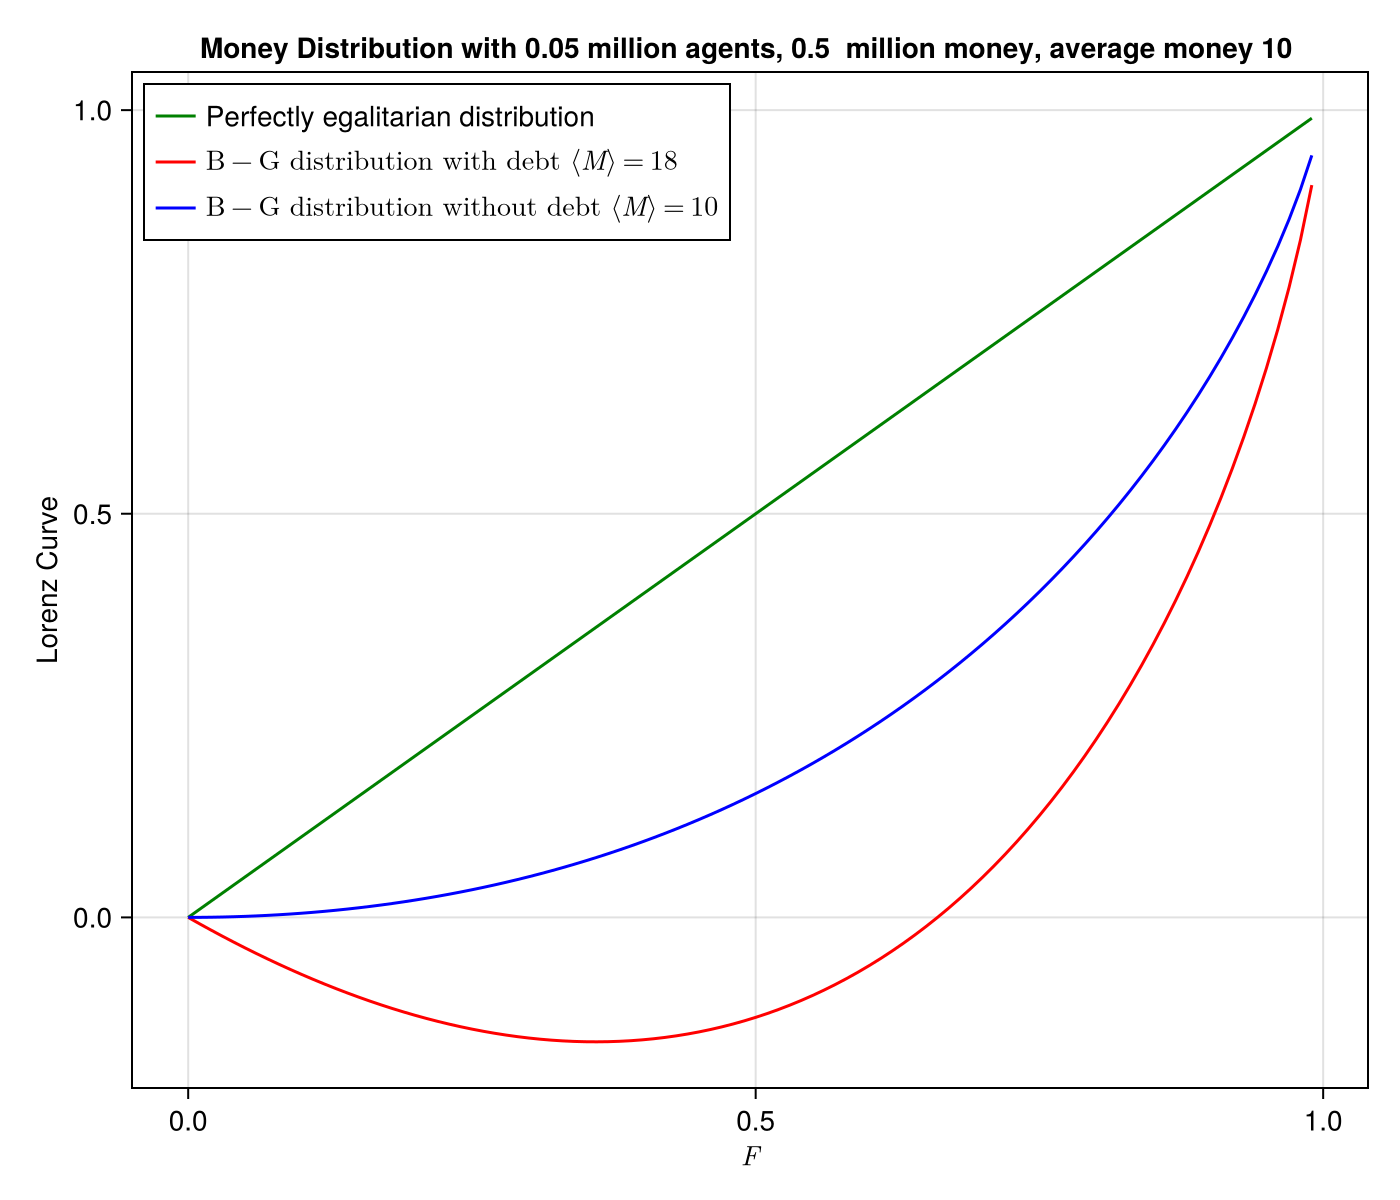

In [138]:
L_a = lorenz_curve(10.0, 8.0, F_d)
L_b = lorenz_curve(10.0, 0.0, F_d)
# Graph
f = Figure(size = (700, 600))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million )  million money, average money $M_prom ",
    xlabel = L"$F$",
    ylabel = "Lorenz Curve",
    #yscale = log
	)
lines!(F_d, F_d, color=:green, label = "Perfectly egalitarian distribution")
lines!(F_d, L_a, color=:red, label = L"B-G distribution with debt $\langle M \rangle = 18$")
lines!(F_d, L_b, color=:blue, label = L"B-G distribution without debt $\langle M \rangle = 10$")

axislegend(position=:lt)
f

En esta figura se observa que la distribución con deuda se aleja más de la distribución igualitaria que la distribución sin deuda. Por último, al introducir la última expresión para $L\left( F \right)$ en la fórmula del coeficiente de Gini e integrar, se obtiene que el coeficiente de Gini de la distribución de dinero B-G con deuda máxima $m_d$ es igual a 

$$
G = 1 - \frac{\left\langle m \right\rangle-m_d}{2\left\langle m \right\rangle} = \frac{1+m_{d}/\left\langle m \right\rangle}{2}
$$

Por lo tanto, en distribuciones de dinero B-G con deuda, a mayor deuda máxima, mayor desigualdad. O lo que es lo mismo, "la deuda aumenta la desigualdad entre los agentes".

# Modelo más realista 

### Descripción del modelo

Para que el modelo sea un poco más realista, introducimos empresas. Un agente a la vez se convierte en una empresa. La empresa toma prestado capital $K$ de otro agente y lo devuelve con un interés $rK$, contrata $L$ agentes y les paga un salario $w$, fabrica $q$ artículos de un producto y los vende a $q$ agentes a un precio $p$. Todos estos agentes son seleccionados aleatoriamente. La empresa recibe la ganancia
$$
\pi = pq - wL - rK
$$

El resultado neto es un intercambio de dinero entre muchos cuerpos que aún satisface la ley de conservación.

Los parámetros del modelo que maximizan la ganancia se obtienen de la siguiente forma:

1) Se establece la curva de oferta-demanda agregada, $p\left( q \right) = V/q^{\eta}$, donde $q$ es la cantidad de productos que la gente compraría a un precio $p$. $V = 100$ y $\eta = 1/2$ son constantes.
2) Se establece la función de producción de la firma es tipo Cobb - Douglas, $q\left( L,K \right) = L^{\beta}K^{1-\beta}$, con $\beta = 8/10$.
3) Se sustituyen las expresiones de los pasos anteriores en la ecuación de la ganancia, y se obtiene la ecuación $\pi\left( L, K \right) = V q^{1-\eta} - wL - rK = V \left(L^{\beta}K^{1-\beta}\right)^{1-\eta} - wL - rK$
4) Se resuelve $\nabla \pi\left( L,K \right) = 0$ para maximizar la ganancia. La solución es 
$$
L^{*} = \left( \frac{V \beta\left( 1-\eta \right)}{w} \right)^{1/\eta}\left( \frac{w \left( 1-\beta \right)}{r\beta} \right)^{\left(1-\beta\right)\left(1-\eta\right)/\eta} \\

K^{*} = \frac{1-\beta}{\beta}\cdot\frac{w}{r}L^{*}
$$

Una vez se establecen los valores de los parámetros $w$ y $r$, se pueden encontrar los valores de $L^{*}$, $K^{*}$, $q^{*} = q \left( L^{*},K^{*}  \right)$, $p^{*} = p \left( q^{*} \right)$ y $\pi_{max}$, en ese orden. Por ejemplo, si $w = 10$ y $r=0.15$, entonces
$$
L^{*} = \simeq 28\\
K^{*} = 468.1\\
q^{*} \simeq 49\\
p^{*} = 14.242\\
\pi_{max} = 351.075
$$

Es decir, con aquellos valores de salario y tasa de interés, la empresa obtendrá una ganancia máxima de 351.1$ si contrata a 28 trabajadores, toma prestado 468.1$ de capital, fabrica 49 artículos de su producto y los vende a 14.2$ cada uno.

### Cómo se van a realizar las simulaciones

Los pasos para realizar una simulación son los siguientes:

1) Se establecen los parámetros $N$, $T$ y $w$. Inicialmente todos los agentes tienen la misma cantidad de dinero $m$, y de ahí $M = N m$.

2) **Préstamo**: Se selecciona un par de agentes al azar del conjunto $A = \left\{ a_i \right\}_{i=1}^{N}$. El primer agente será la empresa $\epsilon$, y el segundo será el prestamista $\rho$. Antes del préstamo se establece una tasa de interés $r = \nu$, donde $\nu_{min} \le \nu \le \nu_{max}$ es una variable aleatoria uniforme. Se calculan los valores de $L^{*}$, $K^{*}$, $q^{*}$ y $p^{*}$, en ese orden. El agente $\rho$ le presta un capital $\Delta m = K$ a $\epsilon$, con $K = K^{*}$ (si $K^{*}$ es mayor que la cantidad de dinero $m_{\rho}$ que posee el agente $\rho$, se repite este paso hasta que se encuentre un agente $\rho$ que pueda prestar capital).

3) **Contratación**: Se establece el número $L$ de trabajadores a contratar de la siguiente manera. Definamos a $f_{L} \equiv L/L^{*}$ como la fracción de trabajadores que el agente $\epsilon$ puede contratar. Si $m_{\epsilon} \ge w L^{*}$, entonces $\epsilon$ tiene dinero suficiente para contratar un número de trabajadores que le permita maximizar su ganancia, por lo que $f_{L} = 1$ y $L = L^{*}$; de lo contrario, $f_{L} = \frac{m_{\epsilon}}{w L^{*}}$, y $L = f_{L} L^{*} = m_{\epsilon}/w$.

4) **Producción**: Se seleccionan $L$ trabajadores al azar del conjunto $B = A - \left\{ \epsilon, \rho \right\}$. Estos trabajadores producen $q = f_{L} q_{c}$ artículos y se les paga el salario $\Delta m = w$ a cada uno de ellos por parte de $\epsilon$.

5) **Venta**: Se selecciona a $Q$ compradores al azar del conjunto $B$. A cada uno de estos compradores se le vende un artículo por parte de $\epsilon$ al precio $\Delta m = p_c$.

6) **Devolución**: El agente $\epsilon$ devuelve a $\rho$ la cantidad $\Delta m = \left( 1 + r \right)K$ por los intereses.
7) Los pasos 2, 3, 4, 5 y 6 se llevan a cabo muchas veces.